In [167]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [112]:
fd = pd.read_csv('..\\csv\\GOLD.csv')
fd.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [113]:
fd.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [114]:
df = fd.dropna()
fd.shape, df.shape

((512, 9), (411, 9))

In [115]:
X = df.iloc[:, 1:5]
y = df['Pred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
lr.coef_

array([ 2.,  3., -1., -4.])

In [118]:
y_pred = lr.predict(X_test)

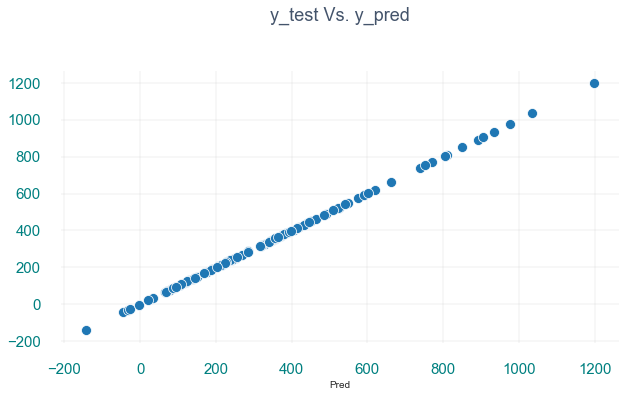

In [119]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title('y_test Vs. y_pred', color='#44546B', pad=50, fontsize=18)

ax.tick_params('x', colors='#008080', labelsize=15, pad=20)
ax.tick_params('y', colors='#008080', labelsize=15, pad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)
sns.scatterplot(x=y_test, y=y_pred, palette=['r', 'blue'], s=100);

#### There is an issue with colors with seaborn and matplotlib. See: https://github.com/mwaskom/seaborn/issues/1682

In [120]:
fd['Pred'] = lr.predict(fd.iloc[:, 1:5])

In [121]:
fd.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

C:\Users\Kaustubh\Miniconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


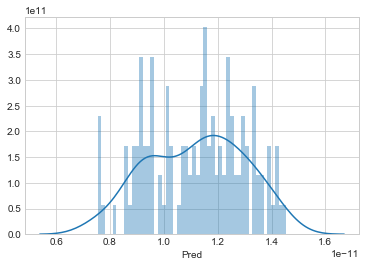

In [122]:
sns.distplot(y_pred - y_test, bins=50);

In [123]:
X = df.iloc[:, 1:5]
y = df['new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
lr.coef_

array([ 1.01178254, -1.00083744,  1.00479598, -1.01576663])

In [129]:
y_pred = lr.predict(X_test)

C:\Users\Kaustubh\Miniconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


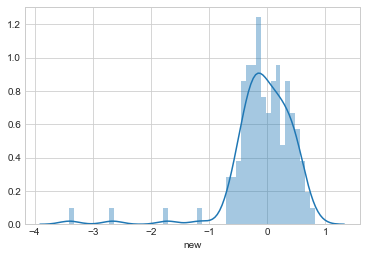

In [131]:
sns.distplot(y_pred - y_test, bins=50);

#### This shows that 'new' is not linearly related and the 'Pred' column is 

In [145]:
tcs = pd.read_csv('..\\stocks\\TCS.csv', parse_dates=[2]).set_index('Date')
nifty = pd.read_csv('..\csv\\Nifty50.csv', parse_dates=[0]).set_index('Date')

tcs = tcs[tcs['Series'] == 'EQ']

In [148]:
prices = pd.concat([nifty['Close'], tcs['Close Price']], axis=1)
prices.columns = ['NIFTY', 'TCS']
prices.head()

,NIFTY,TCS
Date,,
2017-05-15,9445.40,2365.10
2017-05-16,9512.25,2429.15
2017-05-17,9525.75,2455.35
2017-05-18,9429.45,2536.20
2017-05-19,9427.90,2507.15


In [164]:
returns = prices.pct_change()[1:]
returns.head()

,NIFTY,TCS
Date,,
2017-05-16,0.007078,0.027081
2017-05-17,0.001419,0.010786
2017-05-18,-0.010109,0.032928
2017-05-19,-0.000164,-0.011454
2017-05-22,0.001098,0.009652


In [165]:
returns = returns.iloc[-60:, :]

In [170]:
X = returns['NIFTY']
y = returns['TCS']

X1 = sm.add_constant(X)

model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCS   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     6.643
Date:                Sat, 27 Jul 2019   Prob (F-statistic):             0.0125
Time:                        20:15:57   Log-Likelihood:                 166.11
No. Observations:                  60   AIC:                            -328.2
Df Residuals:                      58   BIC:                            -324.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.207      0.8

In [199]:
l = []

for i in set(prices.index.year):
    for j in  set(prices.index.month):
        df_temp = prices[(prices.index.month == j) & (prices.index.year == i)]
        if df_temp.shape[0] > 0:
            l.append(df_temp.iloc[-1, :].values)

In [204]:
df_beta = pd.DataFrame(l, columns=['NIFTY', 'TCS'])
df_beta.head()

,NIFTY,TCS
0,9621.25,2546.60
1,9520.90,2362.35
2,10077.10,2491.80
3,9917.90,2496.35
4,9788.60,2435.95


In [208]:
new_ret = df_beta.pct_change()[1:]

In [210]:
X = new_ret['NIFTY']
y = new_ret['TCS']

X1 = sm.add_constant(X)

model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCS   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.600
Date:                Sat, 27 Jul 2019   Prob (F-statistic):             0.0710
Time:                        20:32:41   Log-Likelihood:                 16.603
No. Observations:                  24   AIC:                            -29.21
Df Residuals:                      22   BIC:                            -26.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.026     -0.178      0.8

#### This means that if the nifty moves by 100 points, TCS moves by 122 points (positive or negative